In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotels-netherlands/HotelFinalDataset.xlsx


In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
 %config Completer.use_jedi = False

# Data Loading

In [4]:
df = pd.read_excel('/kaggle/input/hotels-netherlands/HotelFinalDataset.xlsx')

In [5]:
df

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...,...,...
520,520,Stadslogement Bij de Sassenpoort,Zwolle,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,521,Mercure Hotel Zwolle,Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,522,The Cabin at Zwolle Centraal,Zwolle,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,523,Hanze Hotel Zwolle,Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


We can remove the first column as it is the same as the index of the dataset.
The place column is also redundant with the City and State columns

In [6]:
df = df.drop(['Unnamed: 0', 'Place'], axis=1)

In [7]:
df

,Name,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


# Data preparation 

In [8]:
df.groupby('Type').Name.count()

Type
 Deluxe double or Twin Room                       1
1 Queen or King Bed Essential Room                1
2-person Premium Hotelroom                        1
6 Person Room with Private Bathroom and Shower    1
Apartment                                         2
                                                 ..
Two-Bedroom Chalet                                3
Two-Bedroom House                                 7
Two-Bedroom Suite                                 1
bunk                                              1
nhow Double or Twin Room with View                1
Name: Name, Length: 190, dtype: int64

There are many different types of housing. We'll take into account the words that come up often in the description.

In [9]:
data_set = df.Type.values

In [10]:
data_set = list(data_set)

In [11]:
data_set = ' '.join(data_set)

In [12]:
#here we'll output the ten most common words in the Type column
from collections import Counter
split_str = data_set.split()
  
Counter = Counter(split_str)

common = Counter.most_common(10)
  
print(common)

[('Room', 356), ('Double', 214), ('Twin', 102), ('with', 86), ('Standard', 79), ('Deluxe', 65), ('Apartment', 57), ('Comfort', 47), ('Bathroom', 35), ('One-Bedroom', 32)]


In [13]:
#We can get a list of columns to add to our dataset and make one hot vectors for the types
types = []
for tup in common:
    types.append(tup[0].lower())

In [14]:
print(types)

['room', 'double', 'twin', 'with', 'standard', 'deluxe', 'apartment', 'comfort', 'bathroom', 'one-bedroom']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
pattern = "(?u)\\b[\\w-]+\\b"
cv = CountVectorizer(vocabulary=types, token_pattern=pattern)

one_hot = pd.DataFrame(cv.fit_transform(df['Type']).todense(), 
                   df.index,
                   cv.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
one_hot

,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,1,0,0,0
521,1,1,0,0,1,0,0,0,0,0
522,1,1,0,1,0,0,0,0,1,0
523,1,0,1,0,1,0,0,0,0,0


In [17]:
#we convert data types for the columns
one_hot = one_hot.apply(pd.to_numeric)

In [18]:
df = df.join(one_hot)

In [19]:
df

,Name,Type,Price,ReviewsCount,Rating,City,State,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,0,0,0,0,0,0
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,0,0,0,0,0,0
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,0,0,0,0,0,0
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,0,0,0,0,0,0
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN,0,0,0,0,0,0,1,0,0,0
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN,1,1,0,0,1,0,0,0,0,0
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN,1,1,0,1,0,0,0,0,1,0
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN,1,0,1,0,1,0,0,0,0,0


In [20]:
df = df.drop(['Type'], axis=1)

In [21]:
#removing the currency symbol
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype(float)

In [22]:
#one-hots for City
cities = pd.get_dummies(df['City'])
#one-hots for State
states =pd.get_dummies(df['State']) 

In [23]:
df = df.join(cities)
df = df.join(states)

In [24]:
df

,Name,Price,ReviewsCount,Rating,City,State,room,double,twin,with,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,BUNK Hotel Amsterdam,7.887,778.0,8.4,Amsterdam Noord,Amsterdam,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,YOTEL Amsterdam,15.267,500.0,8.1,Amsterdam Noord,Amsterdam,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Multatuli Hotel,13.063,1605.0,7.4,Amsterdam City Center,Amsterdam,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,nhow Amsterdam Rai,12.854,500.0,9.0,Zuideramstel,Amsterdam,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
4,Motel One Amsterdam,9.471,500.0,8.8,Zuideramstel,Amsterdam,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,8.899,232.0,8.4,Zwolle,NaN,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
521,Mercure Hotel Zwolle,10.205,1402.0,7.7,Zwolle,NaN,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
522,The Cabin at Zwolle Centraal,6.123,149.0,7.2,Zwolle,NaN,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
523,Hanze Hotel Zwolle,7.789,1095.0,7.2,Zwolle,NaN,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
pd.get_dummies(df['City'])

,Amsterdam City Center,Amsterdam Noord,Bemelen,Boschstraatkwartier,Breda,Centrum,City Centre,Delfshaven,Delft,Den Bosch,...,Vlissingen,Voorthuizen,West,Wijck,Woensel-Zuid,Zandvoort,Zuid,Zuideramstel,Zuidwest,Zwolle
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
Names = df['Name']
df = df.drop(['Name', 'City', 'State'], axis=1)

<AxesSubplot:>

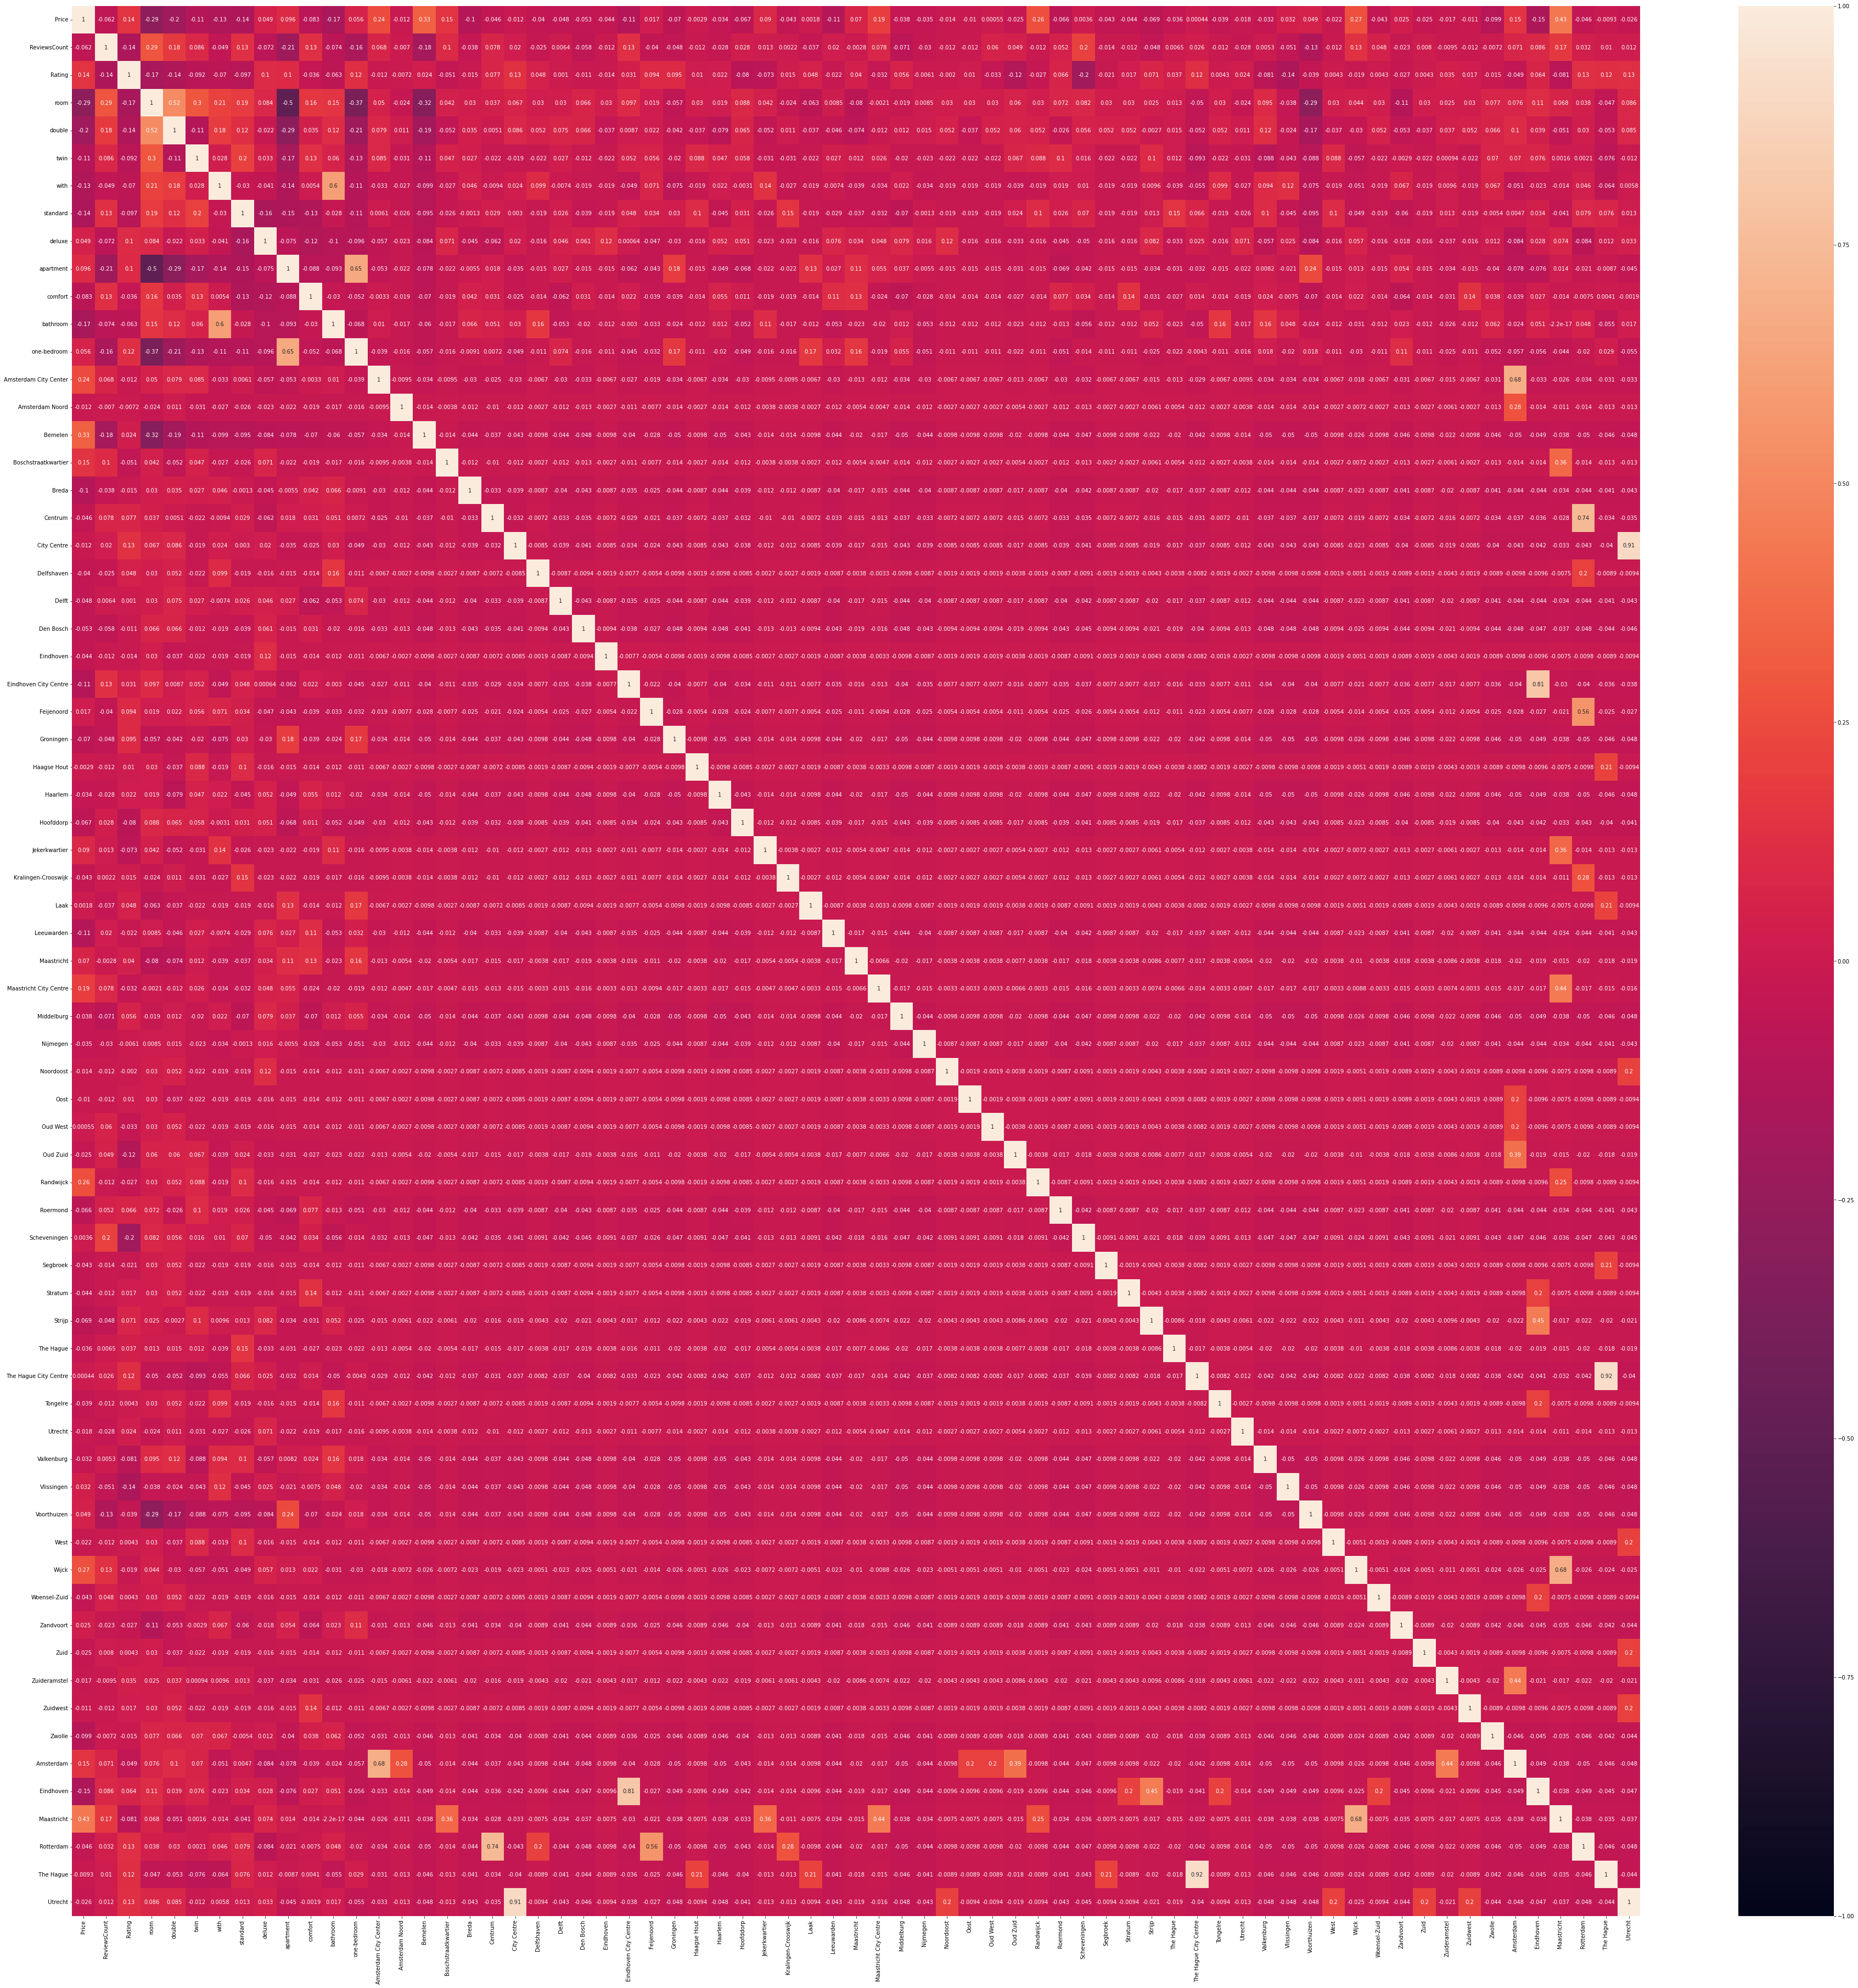

In [27]:
#We can create a heatmap
plt.figure(figsize=(64, 64))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [28]:
df

,Price,ReviewsCount,Rating,room,double,twin,with,standard,deluxe,apartment,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7.887,778.0,8.4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,15.267,500.0,8.1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13.063,1605.0,7.4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12.854,500.0,9.0,1,1,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9.471,500.0,8.8,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,8.899,232.0,8.4,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
521,10.205,1402.0,7.7,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
522,6.123,149.0,7.2,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
523,7.789,1095.0,7.2,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
df.dtypes

Price           float64
ReviewsCount    float64
Rating          float64
room              int64
double            int64
                 ...   
 Eindhoven        uint8
 Maastricht       uint8
 Rotterdam        uint8
 The Hague        uint8
 Utrecht          uint8
Length: 69, dtype: object

# Some Statistics